___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format
from scipy.cluster.hierarchy import dendrogram, linkage

#### Load Dataset

In [227]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [228]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [229]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
129,130,Male,38,71,75
69,70,Female,32,48,47
192,193,Male,33,113,8
140,141,Female,57,75,5
165,166,Female,36,85,75
107,108,Male,54,63,46
183,184,Female,29,98,88
54,55,Female,50,43,45
89,90,Female,50,58,46
196,197,Female,45,126,28


#### Explore Data

You can rename columns to more usable, if you need.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [231]:
df.shape

(200, 5)

In [232]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [233]:
df = df.drop('CustomerID', axis=1)

In [234]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
141,Male,32,75,93
32,Male,53,33,4
21,Male,25,24,73
30,Male,60,30,4
58,Female,27,46,51


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [235]:
df.nunique().sort_values()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [236]:
df.isnull().sum().sort_values(ascending=False).head()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [237]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [238]:
df['Gender'] = df['Gender'].replace(['Female', 'Male'], ['0', '1'])

In [239]:
df['Gender'] = df['Gender'].astype(int)

In [240]:
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


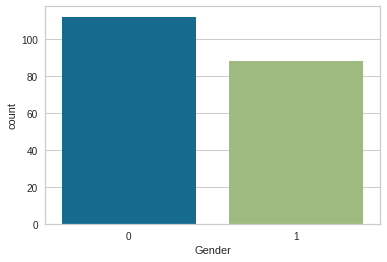

In [341]:
sns.countplot(df['Gender']);

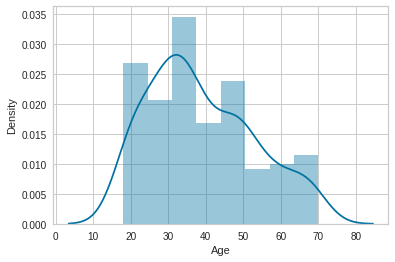

In [243]:
sns.distplot(df['Age'])

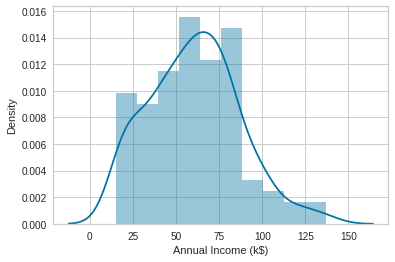

In [244]:
sns.distplot(df['Annual Income (k$)'])

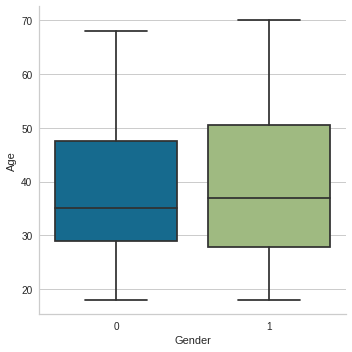

In [245]:
sns.catplot(x="Gender", y="Age", kind="box", data=df);

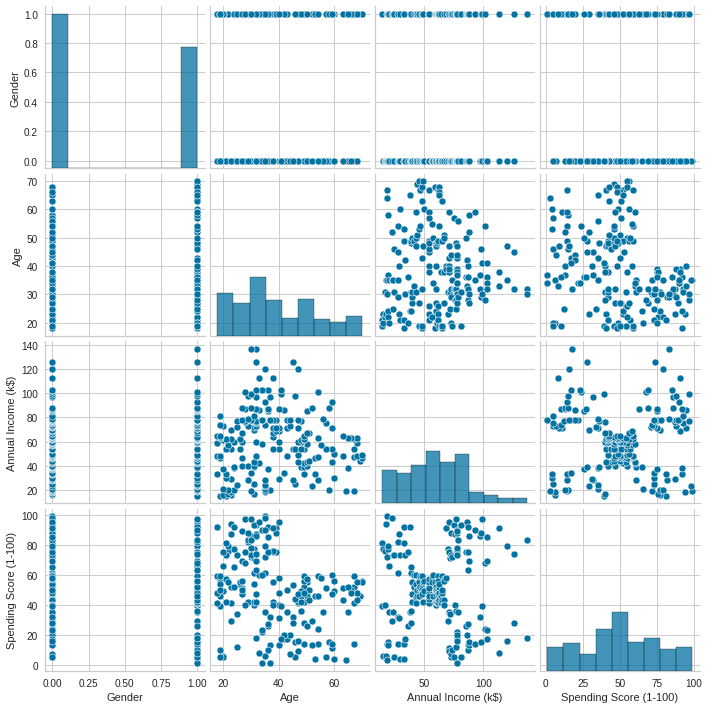

In [246]:
sns.pairplot(df)
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [247]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
50,0,49,42,52
96,0,47,60,47
26,0,45,28,32
156,1,37,78,1
49,0,31,40,42


In [248]:
X = df.drop(['Gender','Annual Income (k$)'], axis = 1)

In [249]:
X.sample(5)

,Age,Spending Score (1-100)
93,40,40
84,21,57
40,65,35
177,27,69
182,46,15


In [250]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5)

In [251]:
K_means_model.fit(X)

KMeans(n_clusters=5)

In [252]:
K_means_model.predict(X)

array([3, 1, 4, 1, 3, 1, 4, 1, 0, 1, 0, 1, 0, 1, 4, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 4, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 4, 1, 0, 1, 4, 1, 0, 1, 3, 1, 4, 1, 2, 1, 4, 1, 0, 1, 0, 1,
       0, 1, 4, 1, 4, 1, 2, 1, 4, 1, 0, 1, 0, 1, 4, 3, 4, 1, 4, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 3, 1, 0, 1, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1,
       4, 1], dtype=int32)

In [253]:
K_means_model.fit_predict(X)

array([3, 0, 4, 0, 3, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 4, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 4, 0, 1, 0, 4, 0, 1, 0, 3, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 4, 3, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0], dtype=int32)

In [254]:
K_means_model.labels_

array([3, 0, 4, 0, 3, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 4, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 4, 0, 1, 0, 4, 0, 1, 0, 3, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 4, 3, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0], dtype=int32)

#### *ii. Determine optimal number of clusters*

In [255]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [256]:
hopkins(X, X.shape[0])
## Sıfıra yakın clustering için uygun..

0.3076294144467728

In [257]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

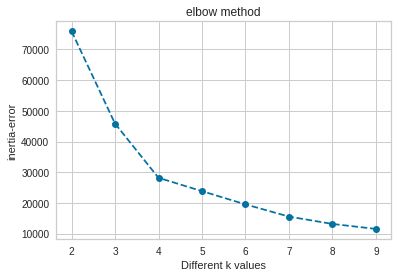

In [258]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [259]:
data=df.iloc[:,[1,2]].values

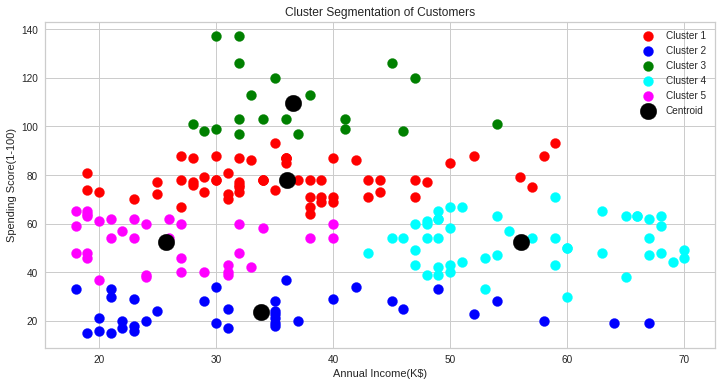

In [260]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=275,c='black',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [261]:
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23819.442236543735,
 19502.4078393622,
 15523.684014328752,
 13126.707755207757,
 11505.396645622899]

In [262]:
-pd.Series(ssd).diff()

0         NaN
1   30,108.48
2   17,675.09
3    4,346.14
4    4,317.03
5    3,978.72
6    2,396.98
7    1,621.31
dtype: float64

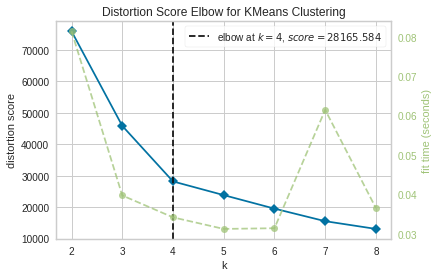

In [263]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans()
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        
visualizer.poof();


### Why silhouette_score is negative?

In [264]:
from sklearn.metrics import silhouette_score

In [265]:
K_means_model.labels_

array([3, 0, 4, 0, 3, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 4, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 4, 0, 1, 0, 4, 0, 1, 0, 3, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 4, 3, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       4, 0], dtype=int32)

In [266]:
silhouette_score(X, K_means_model.labels_)

0.46801203307643385

In [267]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
   
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43167500325197866
For n_clusters=6, the silhouette score is 0.43762552403747423
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.43410800435629476


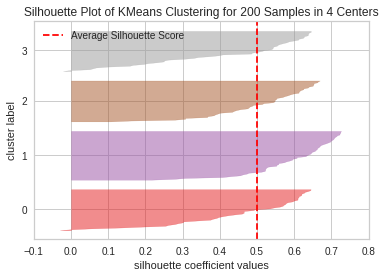

In [268]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4)          
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)
visualizer.poof();

In [269]:
model3.labels_

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [270]:
visualizer.silhouette_samples_

array([ 5.41704401e-01,  6.06427697e-01,  3.90692354e-01,  5.72388690e-01,
        4.85877135e-01,  5.29623931e-01,  5.99685286e-01,  6.45443747e-01,
        4.38661178e-01,  4.77367625e-01,  3.01027300e-01,  6.33591468e-01,
        4.64200102e-01,  5.87165454e-01,  6.11887393e-01,  5.95298366e-01,
        2.49515369e-01, -6.38269698e-04,  5.35146574e-02,  6.43523035e-01,
        2.49515369e-01,  4.72208348e-01,  6.28460918e-01,  5.23057518e-01,
        5.44149704e-01,  7.05479532e-01,  1.80808145e-03,  2.61008835e-01,
        1.32902431e-01,  6.68864152e-01,  4.94735307e-01,  4.06403093e-01,
        5.75372306e-01,  5.94131411e-01,  6.08580878e-01,  6.06427697e-01,
        6.19692628e-01,  5.21751518e-01,  3.01363453e-01,  4.60993550e-01,
        3.93975989e-01,  6.67339529e-01,  3.06655386e-01,  3.03109441e-01,
        1.89220192e-01,  5.00927844e-02,  4.86477440e-01,  6.26659654e-01,
        5.55217490e-01,  5.12603191e-01,  4.89791113e-01,  3.41182419e-01,
        5.42290734e-01,  

In [271]:
labels_0 = (model3.labels_ == 0)
labels_0

array([False, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [272]:
labels_1 = (model3.labels_ == 1)
labels_1

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,

In [273]:
labels_2 = (model3.labels_ == 2)
labels_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False,

In [274]:
labels_3 = (model3.labels_ == 3)
labels_3

array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False,

In [275]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_3].mean()
mean_silhoutte_score_1

0.4197289676734112

In [276]:
mean_silhoutte_score_2 = visualizer.silhouette_samples_[labels_3].mean()
mean_silhoutte_score_2

0.4197289676734112

In [277]:
#model2.n_clusters
for i in range(4):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.45429047261675404
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.5091299145013191
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [278]:
model = KMeans(n_clusters = 4)
model.fit_predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [279]:
clusters = model.labels_

In [280]:
X.sample(15)

,Age,Spending Score (1-100)
152,44,20
184,41,39
23,31,73
0,19,39
20,35,35
56,51,50
76,45,53
85,48,46
141,32,93
169,32,63


In [281]:
X["predicted_clusters"] = clusters
X

,Age,Spending Score (1-100),predicted_clusters
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


In [282]:
X['Class'] = X['predicted_clusters'].replace([0,1,2,3], ['En Düşük', 'En Yüksek','Orta-düşük', 'Orta Yüksek'])

In [283]:
X.sample(10)

,Age,Spending Score (1-100),predicted_clusters,Class
167,33,95,1,En Yüksek
191,32,69,1,En Yüksek
36,42,17,0,En Düşük
9,30,72,1,En Yüksek
38,36,26,0,En Düşük
136,44,7,0,En Düşük
175,30,86,1,En Yüksek
188,41,17,0,En Düşük
116,63,43,3,Orta Yüksek
131,39,75,1,En Yüksek


In [284]:
Hiarc = X

In [285]:
Hiarc

,Age,Spending Score (1-100),predicted_clusters,Class
0,19,39,2,Orta-düşük
1,21,81,1,En Yüksek
2,20,6,0,En Düşük
3,23,77,1,En Yüksek
4,31,40,2,Orta-düşük
...,...,...,...,...
195,35,79,1,En Yüksek
196,45,28,0,En Düşük
197,32,74,1,En Yüksek
198,32,18,0,En Düşük


### Clustering based on Annual Income and Spending Score

In [286]:
X= X.drop(["Class","predicted_clusters"], axis =1)

In [287]:
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


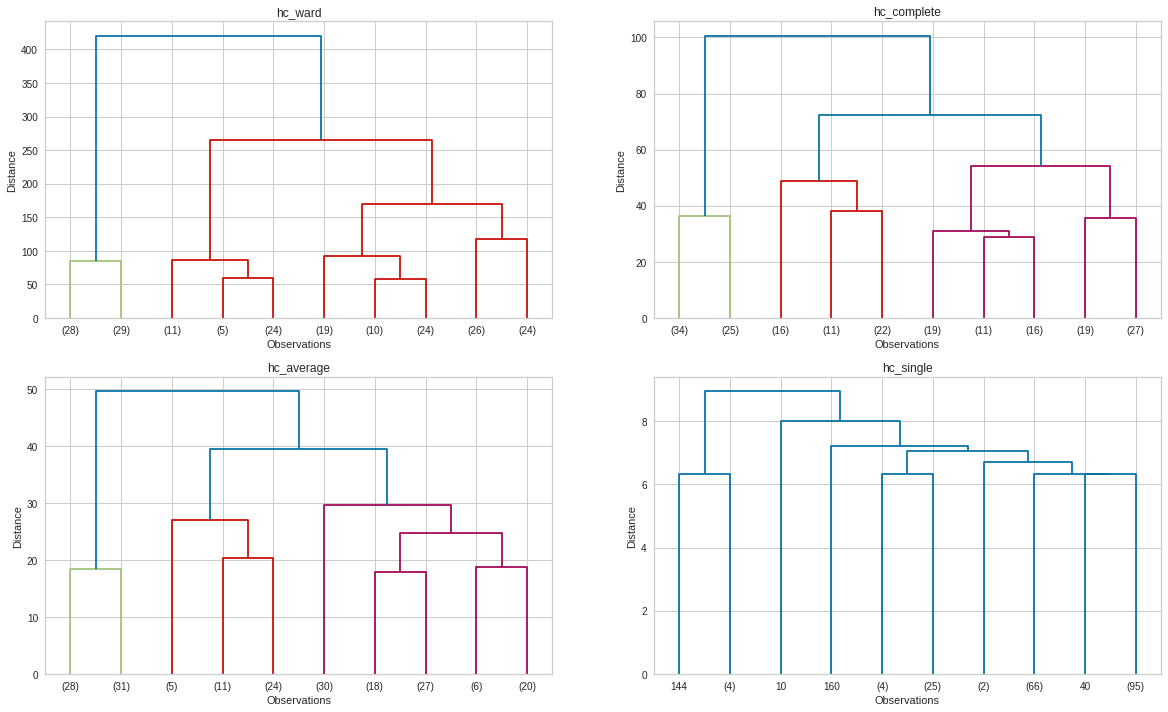

In [288]:
linkage_dict = {"hc_ward" : linkage(y = X, method = "ward"),
                "hc_complete" : linkage(X, "complete"),
                "hc_average" : linkage(X, "average"),
                "hc_single" : linkage(X, "single")}


plot_list = list(range(221,225))

plt.figure(figsize = (20,12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

In [289]:
from sklearn.cluster import AgglomerativeClustering

In [305]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [306]:
X["classh"] = model1.labels_
X

,Age,Spending Score (1-100),classh
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0
...,...,...,...
195,35,79,3
196,45,28,0
197,32,74,3
198,32,18,2


In [307]:
X.head(10)

,Age,Spending Score (1-100),classh
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0
5,22,76,3
6,35,6,2
7,23,94,3
8,64,3,2
9,30,72,3


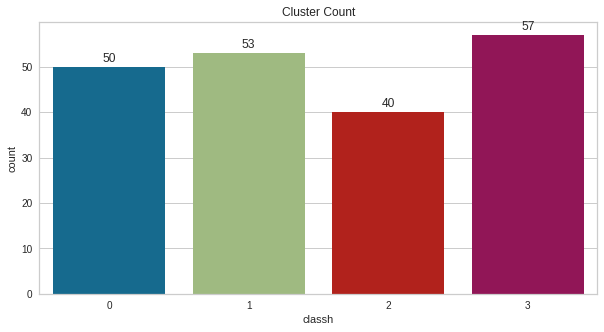

In [308]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = X.classh)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [309]:
X.groupby("classh")["Spending Score (1-100)"].mean()

classh
0   43.62
1   50.45
2   12.28
3   82.35
Name: Spending Score (1-100), dtype: float64

In [310]:
K = range(2,8)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.45574187438400754
Silhouette Score for 3 clusters: 0.4424303965865437
Silhouette Score for 4 clusters: 0.46147471339798707
Silhouette Score for 5 clusters: 0.4056310662315043
Silhouette Score for 6 clusters: 0.41437245353747093
Silhouette Score for 7 clusters: 0.4174555953717665


In [312]:
print(f'Silhouette Score(n=3): {silhouette_score(X, X.classh)}')

Silhouette Score(n=3): 0.46147471339798707


In [317]:
X["index_no"] = X.index
Hiarc["index_no"] = Hiarc.index

In [320]:
X.sample(3)

,Age,Spending Score (1-100),classh,index_no
134,20,5,2,134
18,52,29,0,18
188,41,17,2,188


In [323]:
Hiarc.sample(3)

,Age,Spending Score (1-100),predicted_clusters,Class,index_no
48,29,42,2,Orta-düşük,48
156,37,1,0,En Düşük,156
190,34,23,0,En Düşük,190


In [327]:
X['classh_label'] = X['classh'].replace([2,0,1,3], ['En Düşük', 'En Yüksek','Orta-düşük', 'Orta Yüksek'])

In [328]:
X

,Age,Spending Score (1-100),classh,index_no,classh_label
0,19,39,0,0,En Yüksek
1,21,81,3,1,Orta Yüksek
2,20,6,2,2,En Düşük
3,23,77,3,3,Orta Yüksek
4,31,40,0,4,En Yüksek
...,...,...,...,...,...
195,35,79,3,195,Orta Yüksek
196,45,28,0,196,En Yüksek
197,32,74,3,197,Orta Yüksek
198,32,18,2,198,En Düşük


In [329]:
mrg_df = pd.merge(left = X, right = Hiarc, how = "inner")
mrg_df.drop("index_no", axis = 1, inplace= True)
mrg_df

,Age,Spending Score (1-100),classh,classh_label,predicted_clusters,Class
0,19,39,0,En Yüksek,2,Orta-düşük
1,21,81,3,Orta Yüksek,1,En Yüksek
2,20,6,2,En Düşük,0,En Düşük
3,23,77,3,Orta Yüksek,1,En Yüksek
4,31,40,0,En Yüksek,2,Orta-düşük
...,...,...,...,...,...,...
195,35,79,3,Orta Yüksek,1,En Yüksek
196,45,28,0,En Yüksek,0,En Düşük
197,32,74,3,Orta Yüksek,1,En Yüksek
198,32,18,2,En Düşük,0,En Düşük


In [340]:
mrg_df[mrg_df['classh_label'] == mrg_df['Class']]

,Age,Spending Score (1-100),classh,classh_label,predicted_clusters,Class
2,20,6,2,En Düşük,0,En Düşük
6,35,6,2,En Düşük,0,En Düşük
8,64,3,2,En Düşük,0,En Düşük
10,67,14,2,En Düşük,0,En Düşük
12,58,15,2,En Düşük,0,En Düşük
14,37,13,2,En Düşük,0,En Düşük
22,46,5,2,En Düşük,0,En Düşük
24,54,14,2,En Düşük,0,En Düşük
27,35,61,1,Orta-düşük,2,Orta-düşük
30,60,4,2,En Düşük,0,En Düşük


#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___